**1 Setup** 

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**2 Import Data**

In [30]:
 # df = pd.read_csv()
crash_df = sns.load_dataset('car_crashes')
crash_df.head(10)


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


**2 Distribution Plots**

**2.1 Distribution Plots**

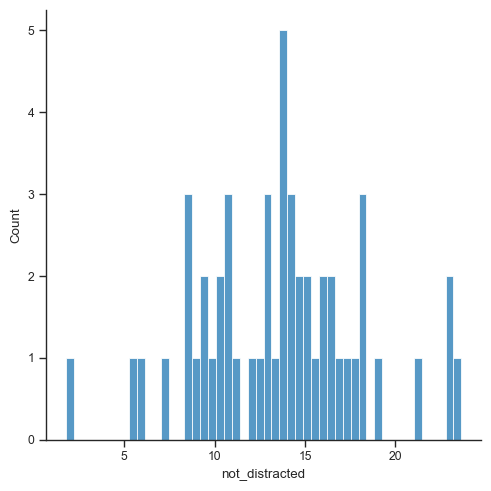

In [31]:
sns.displot(crash_df['not_distracted'],kde=False,bins=50)
plt.show()

**2.2 Joint Plot**


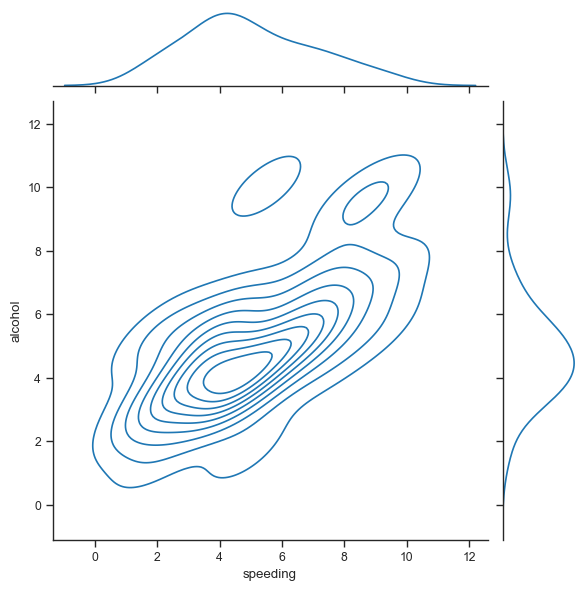

In [32]:
sns.jointplot(x='speeding',y='alcohol',data=crash_df,kind='kde') # king =␣['kde','hex','reg']
plt.show()


**2.3 KDE Plot**

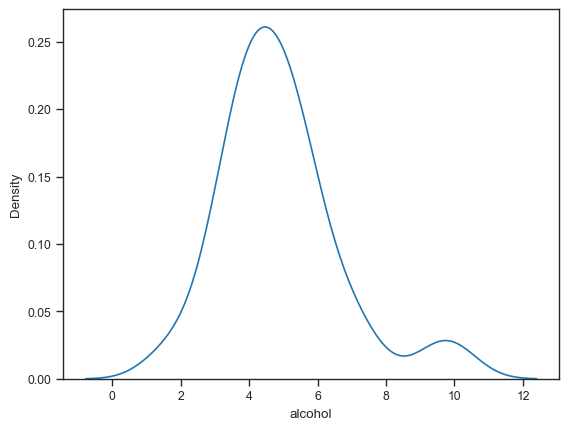

In [33]:
sns.kdeplot(crash_df['alcohol'])
plt.show()


**2.4 Pair Plot**

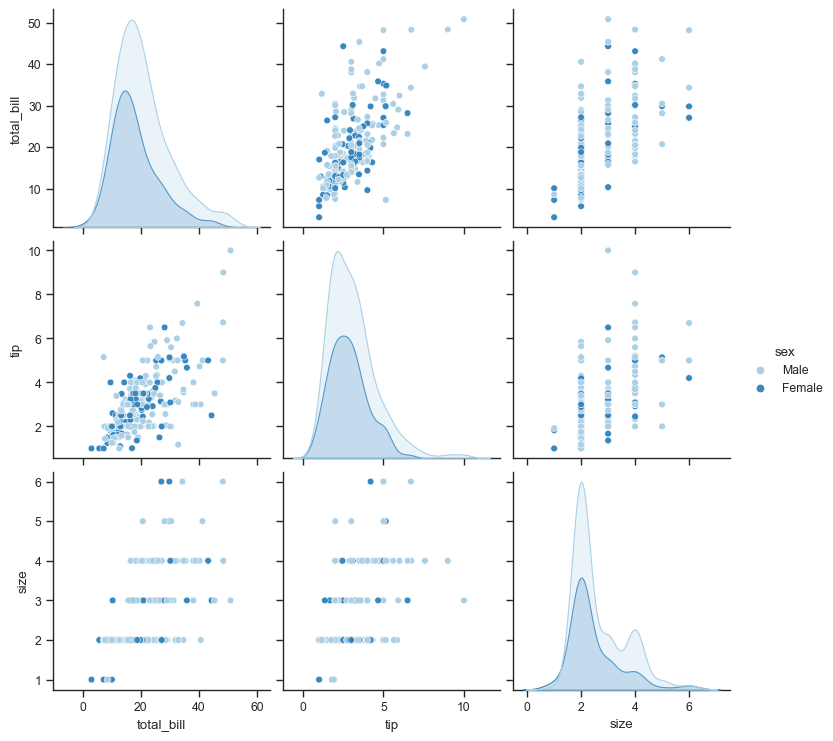

In [34]:
tips_df = sns.load_dataset('tips')
sns.pairplot(tips_df,hue='sex',palette='Blues') # hue :-> with hue we can pass␣the categorial data and chart will be colorised based on that data
plt.show()

**2.5 Styling**

<Figure size 200x200 with 0 Axes>

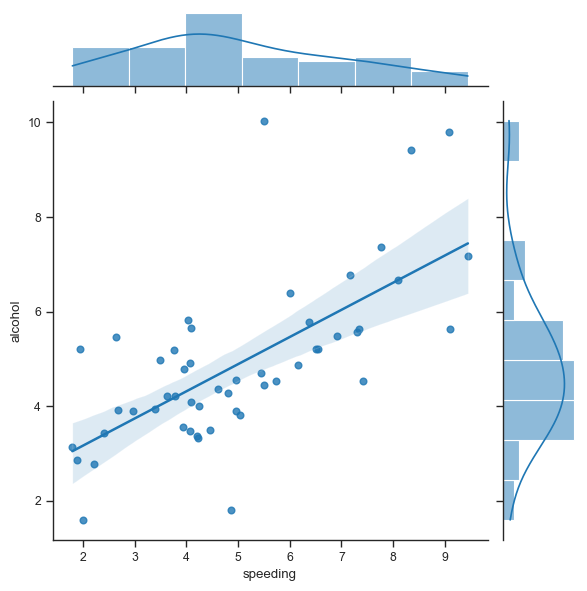

In [35]:
sns.set_style('ticks') # style= ['white','whitegrid',dark,ticks,'darkgrid']
sns.set_context('paper',font_scale=1.0) # [paper,talk,poster]
plt.figure(figsize=(2,2))
sns.jointplot(x='speeding',y='alcohol',data=crash_df,kind='reg')
# sns.despine(left=True,bottom=True) # [right, top]
plt.show()


**3 Categorical Plots**

**3.1 Bar Plot**

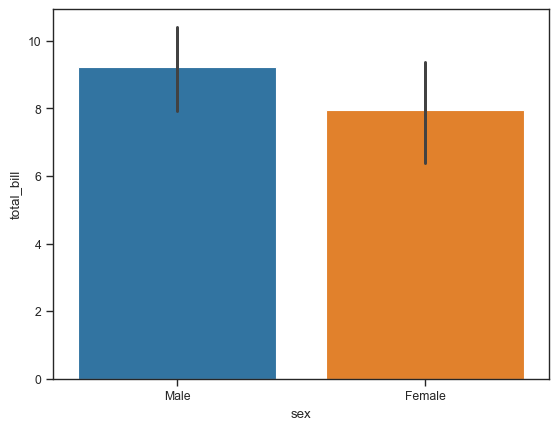

In [36]:
sns.barplot(x='sex',y='total_bill',data=tips_df,estimator=np.std) #␣estimator=[median,mean(default),np.std(StandardDeviation), np.var(varience),np.cov(coverience),custom]
plt.show()


**3.2 Count Plot**

<AxesSubplot:xlabel='sex', ylabel='count'>

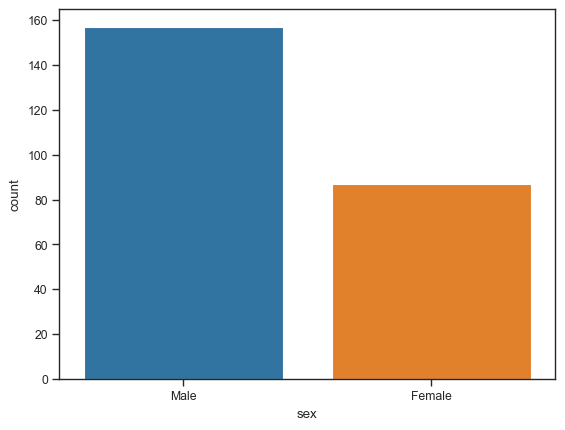

In [37]:
 # kind of bar plot but estimator is just count the number of occurances
sns.countplot(x='sex',data=tips_df)


**3.3 Box Plot**

<AxesSubplot:xlabel='day', ylabel='total_bill'>

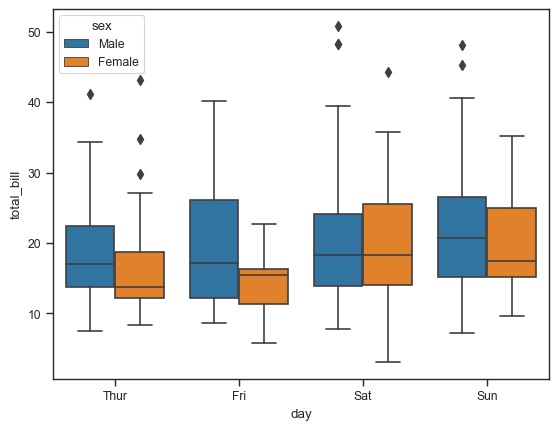

In [38]:
# A box plot is going to compare the different variables qurtile of the data
sns.boxplot(x='day',y='total_bill',data=tips_df,hue='sex')


**3.4 Violin Plot**


<AxesSubplot:xlabel='day', ylabel='total_bill'>

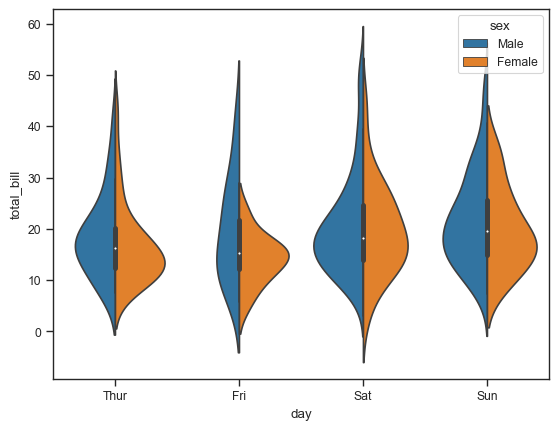

In [39]:
# it is combination of box plot and a kde plot
# a violin plot uses the kde estimation of data points
sns.violinplot(x='day',y='total_bill',data=tips_df,hue='sex',split=True)

**3.5 Strip Plot**

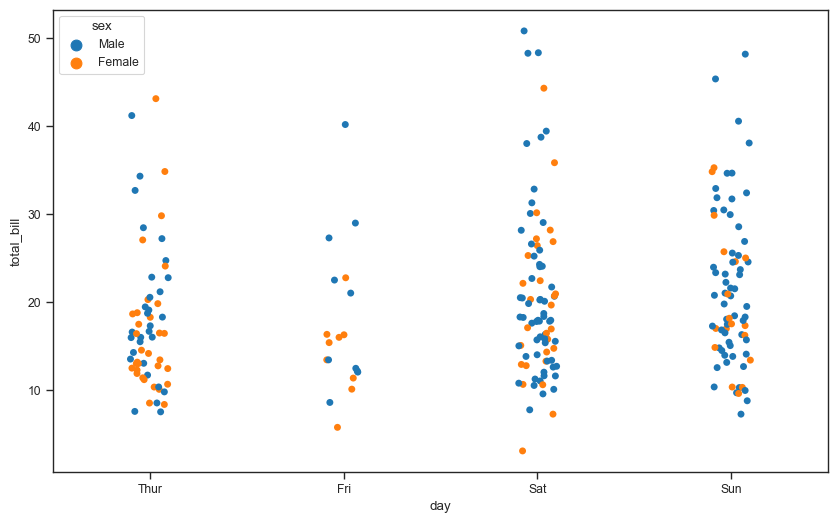

In [40]:
# strip plot draws the scatter plot represents all data points where one␣variable is categorical
plt.figure(figsize=(10,6))
sns.stripplot(x='day',y='total_bill',data=tips_df,jitter=True,hue='sex') #␣,dodge=True :-> seprates the data
plt.show()


**4 Matrix Plot**


**4.1 HeatMap**

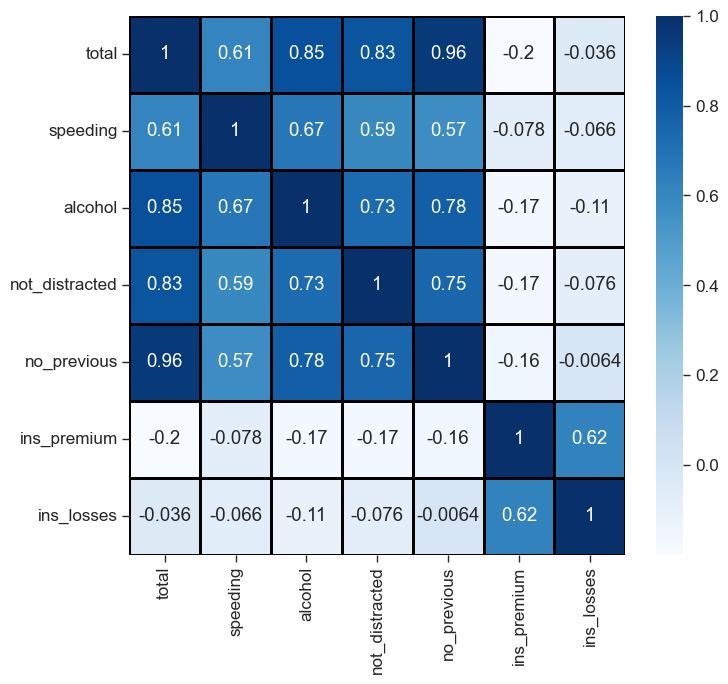

In [41]:
plt.figure(figsize=(8,7))
sns.set_context('paper',font_scale=1.4)
crash_mx = crash_df.corr()
sns.heatmap(crash_mx,annot=True,cmap='Blues',linewidth=1,linecolor='black')
plt.show()


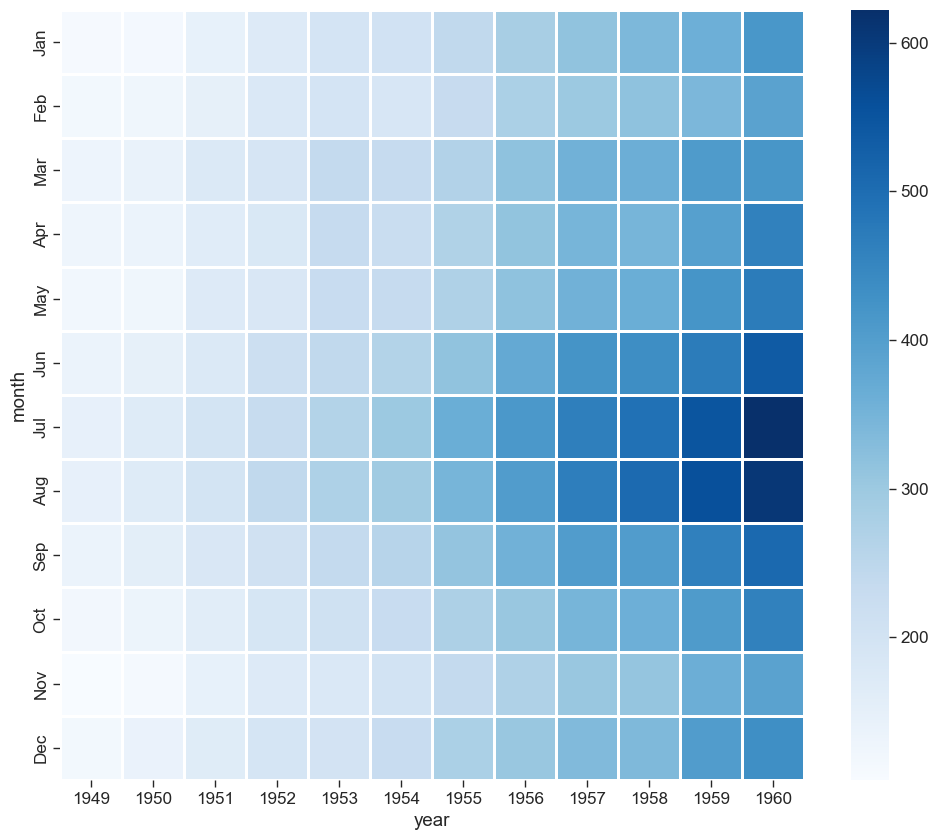

In [42]:
plt.figure(figsize=(12,10))
flights_df = sns.load_dataset('flights')
flights = flights_df.pivot_table(index='month',columns='year',values='passengers')
sns.heatmap(flights,cmap='Blues',linecolor='white',linewidth=1)
plt.show()

**4.2 Cluster Map**

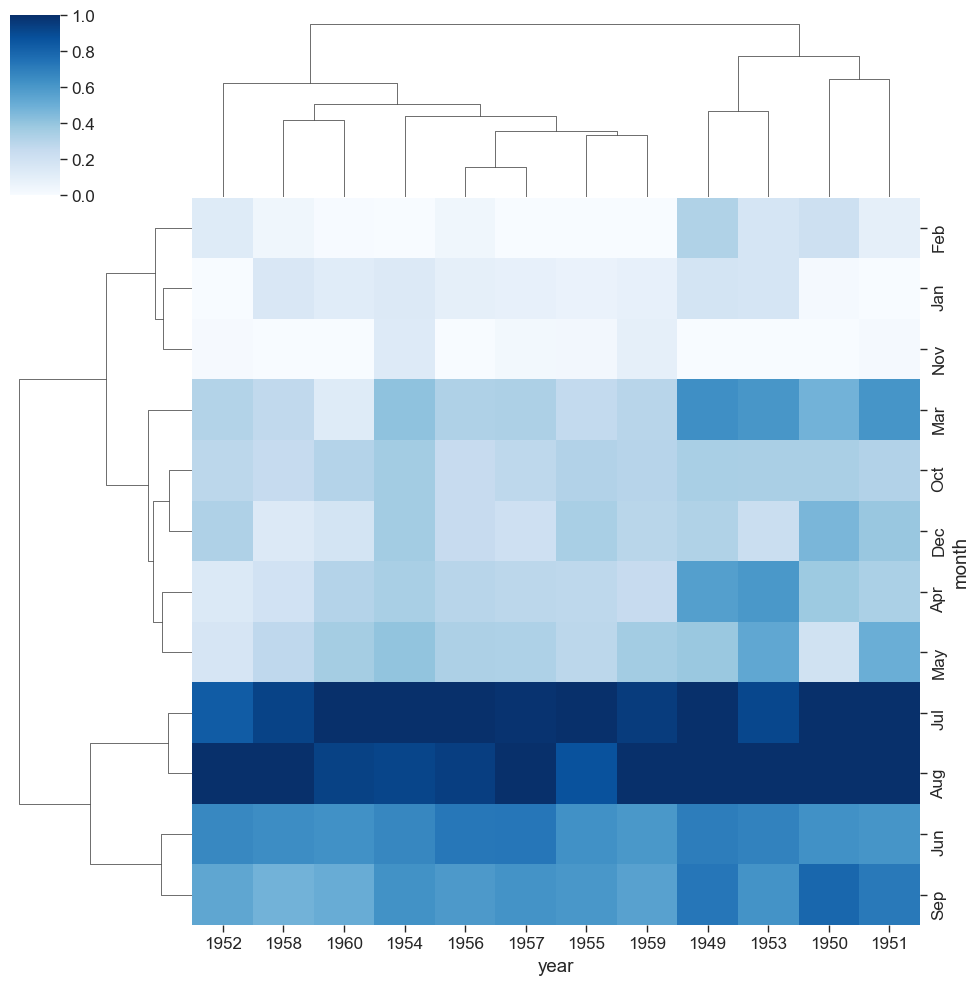

In [43]:
iris = sns.load_dataset('iris')
# species = iris.pop('species')
# sns.clustermap(iris)
sns.clustermap(flights,cmap='Blues',standard_scale=1)

**4.3 Pair Grid**

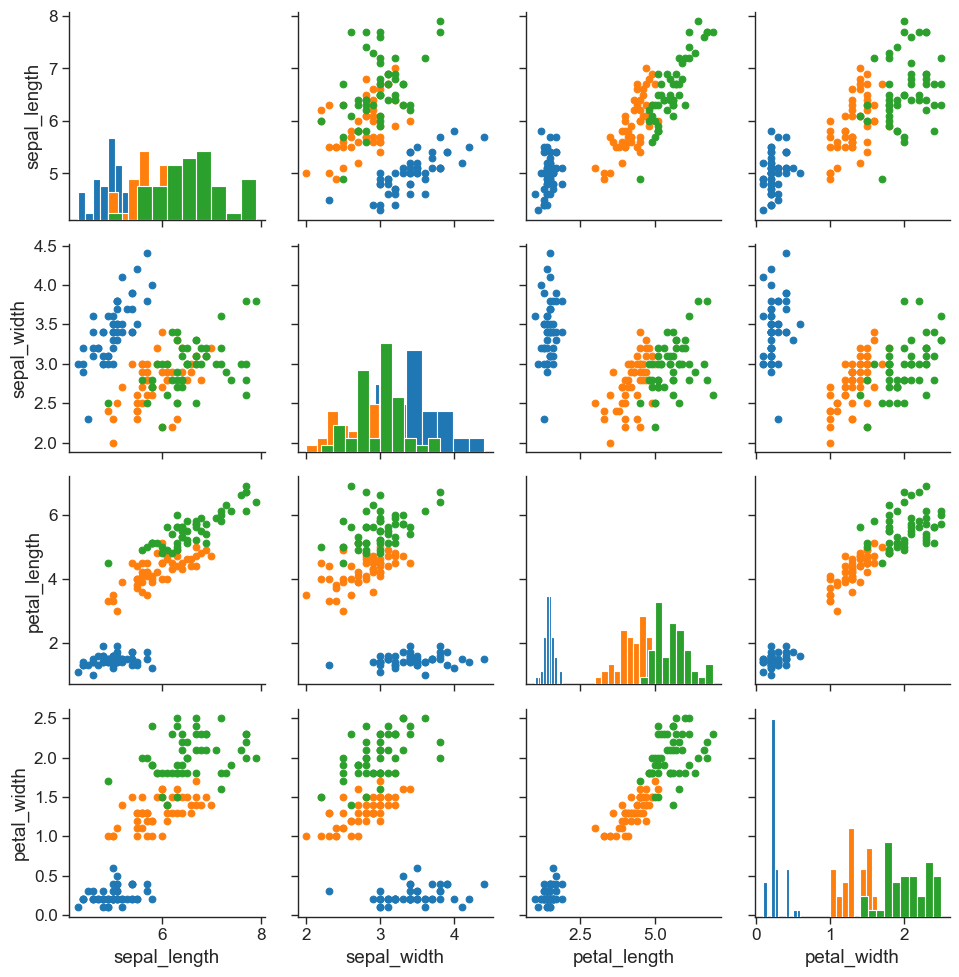

In [44]:
# to plot or change the default plots in the different position use the␣'shift+tab' [iris_g.map_upper,.map_lower,.map_offdiag,...]
iris_g = sns.PairGrid(iris,hue='species')
# iris_g.map(plt.scatter)
iris_g.map_diag(plt.hist)
iris_g.map_offdiag(plt.scatter)


**4.4 Facet Grid** 

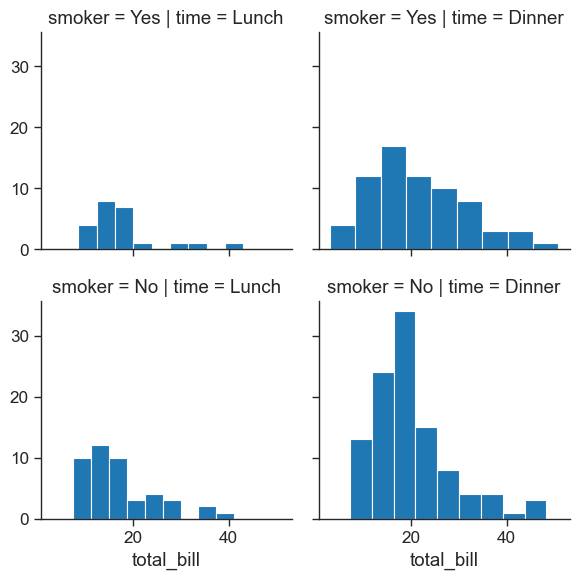

In [46]:
import seaborn as sns
# this can plot multiple plot in a grid and in this we can define the columns␣and rows
tips_fg = sns.FacetGrid(tips_df,col='time',row='smoker') # to draw the plot fig␣with only axis no data in it
# sns.set_context('paper',font_scale=1.2)
tips_fg.map(plt.hist, 'total_bill',bins=9) 

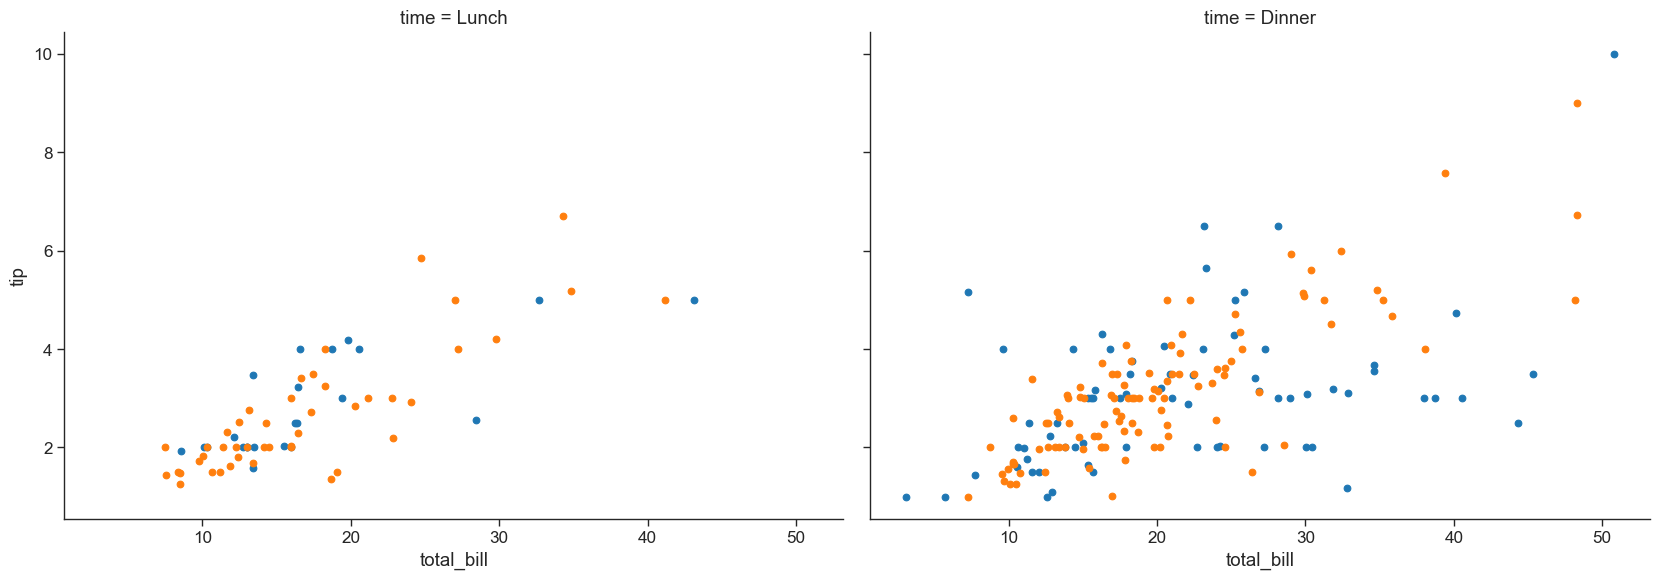

In [47]:
tips_fg1 = sns.FacetGrid(tips_df,col='time',hue='smoker',height=6,aspect=1.4)
tips_fg1.map(plt.scatter,'total_bill','tip')


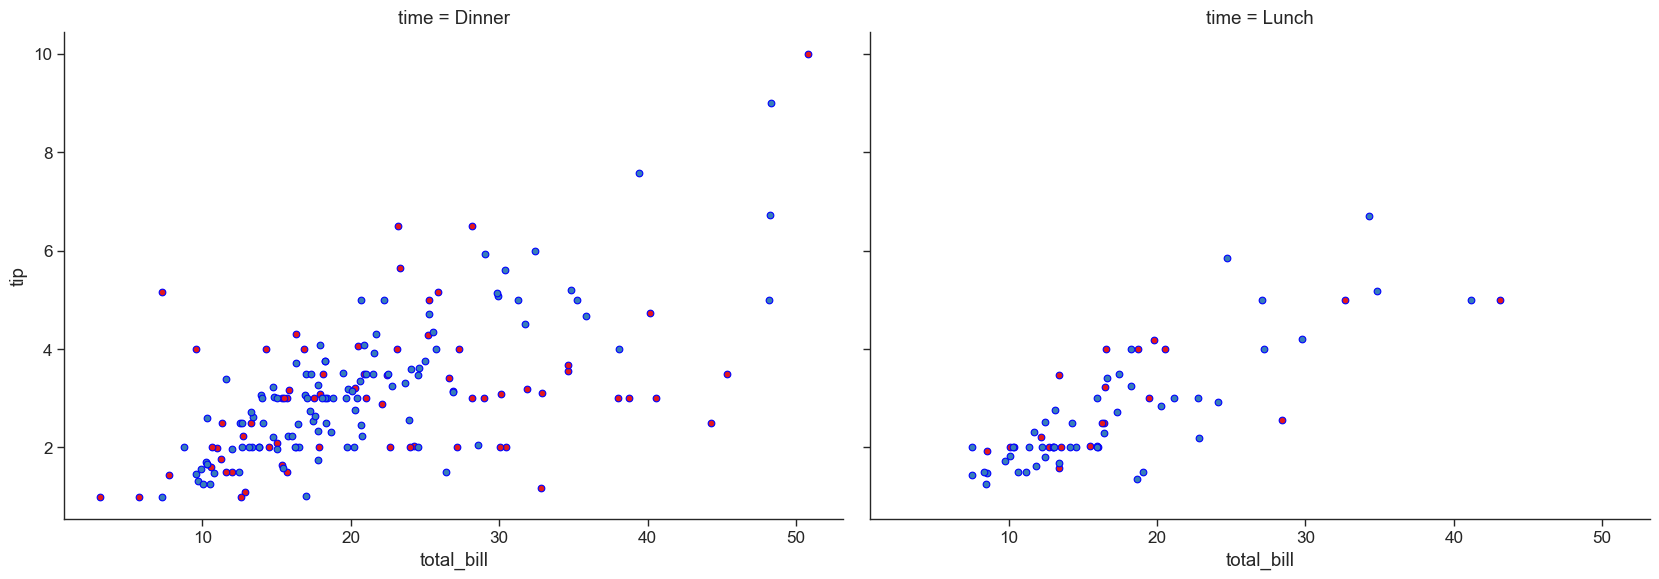

In [48]:
tips_fg2 = sns.FacetGrid(tips_df,col='time',hue='smoker',height=6,aspect=1.4,col_order=['Dinner','Lunch'],palette='Set1')
tips_fg2.map(plt.scatter,'total_bill','tip',edgecolor='b')

**4.5 Regression Plot** 

<Figure size 800x600 with 0 Axes>

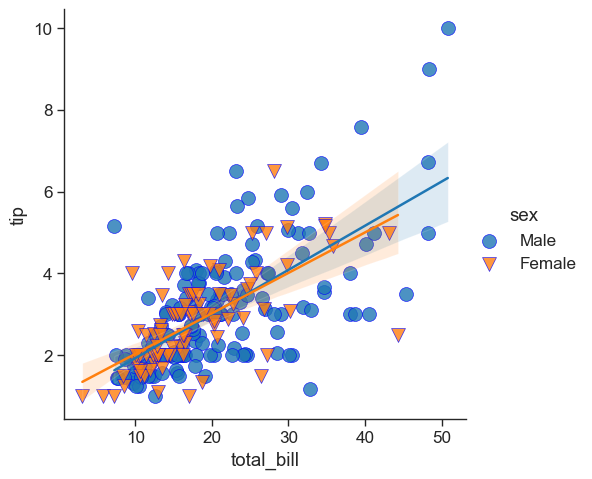

In [49]:
plt.figure(figsize=(8,6))
sns.set_context('paper',font_scale=1.4)
sns.lmplot(x='total_bill',y='tip',hue='sex',data=tips_df,markers=['o','v'],scatter_kws={'s':100,'linewidth':0.5,'edgecolor':'b'})


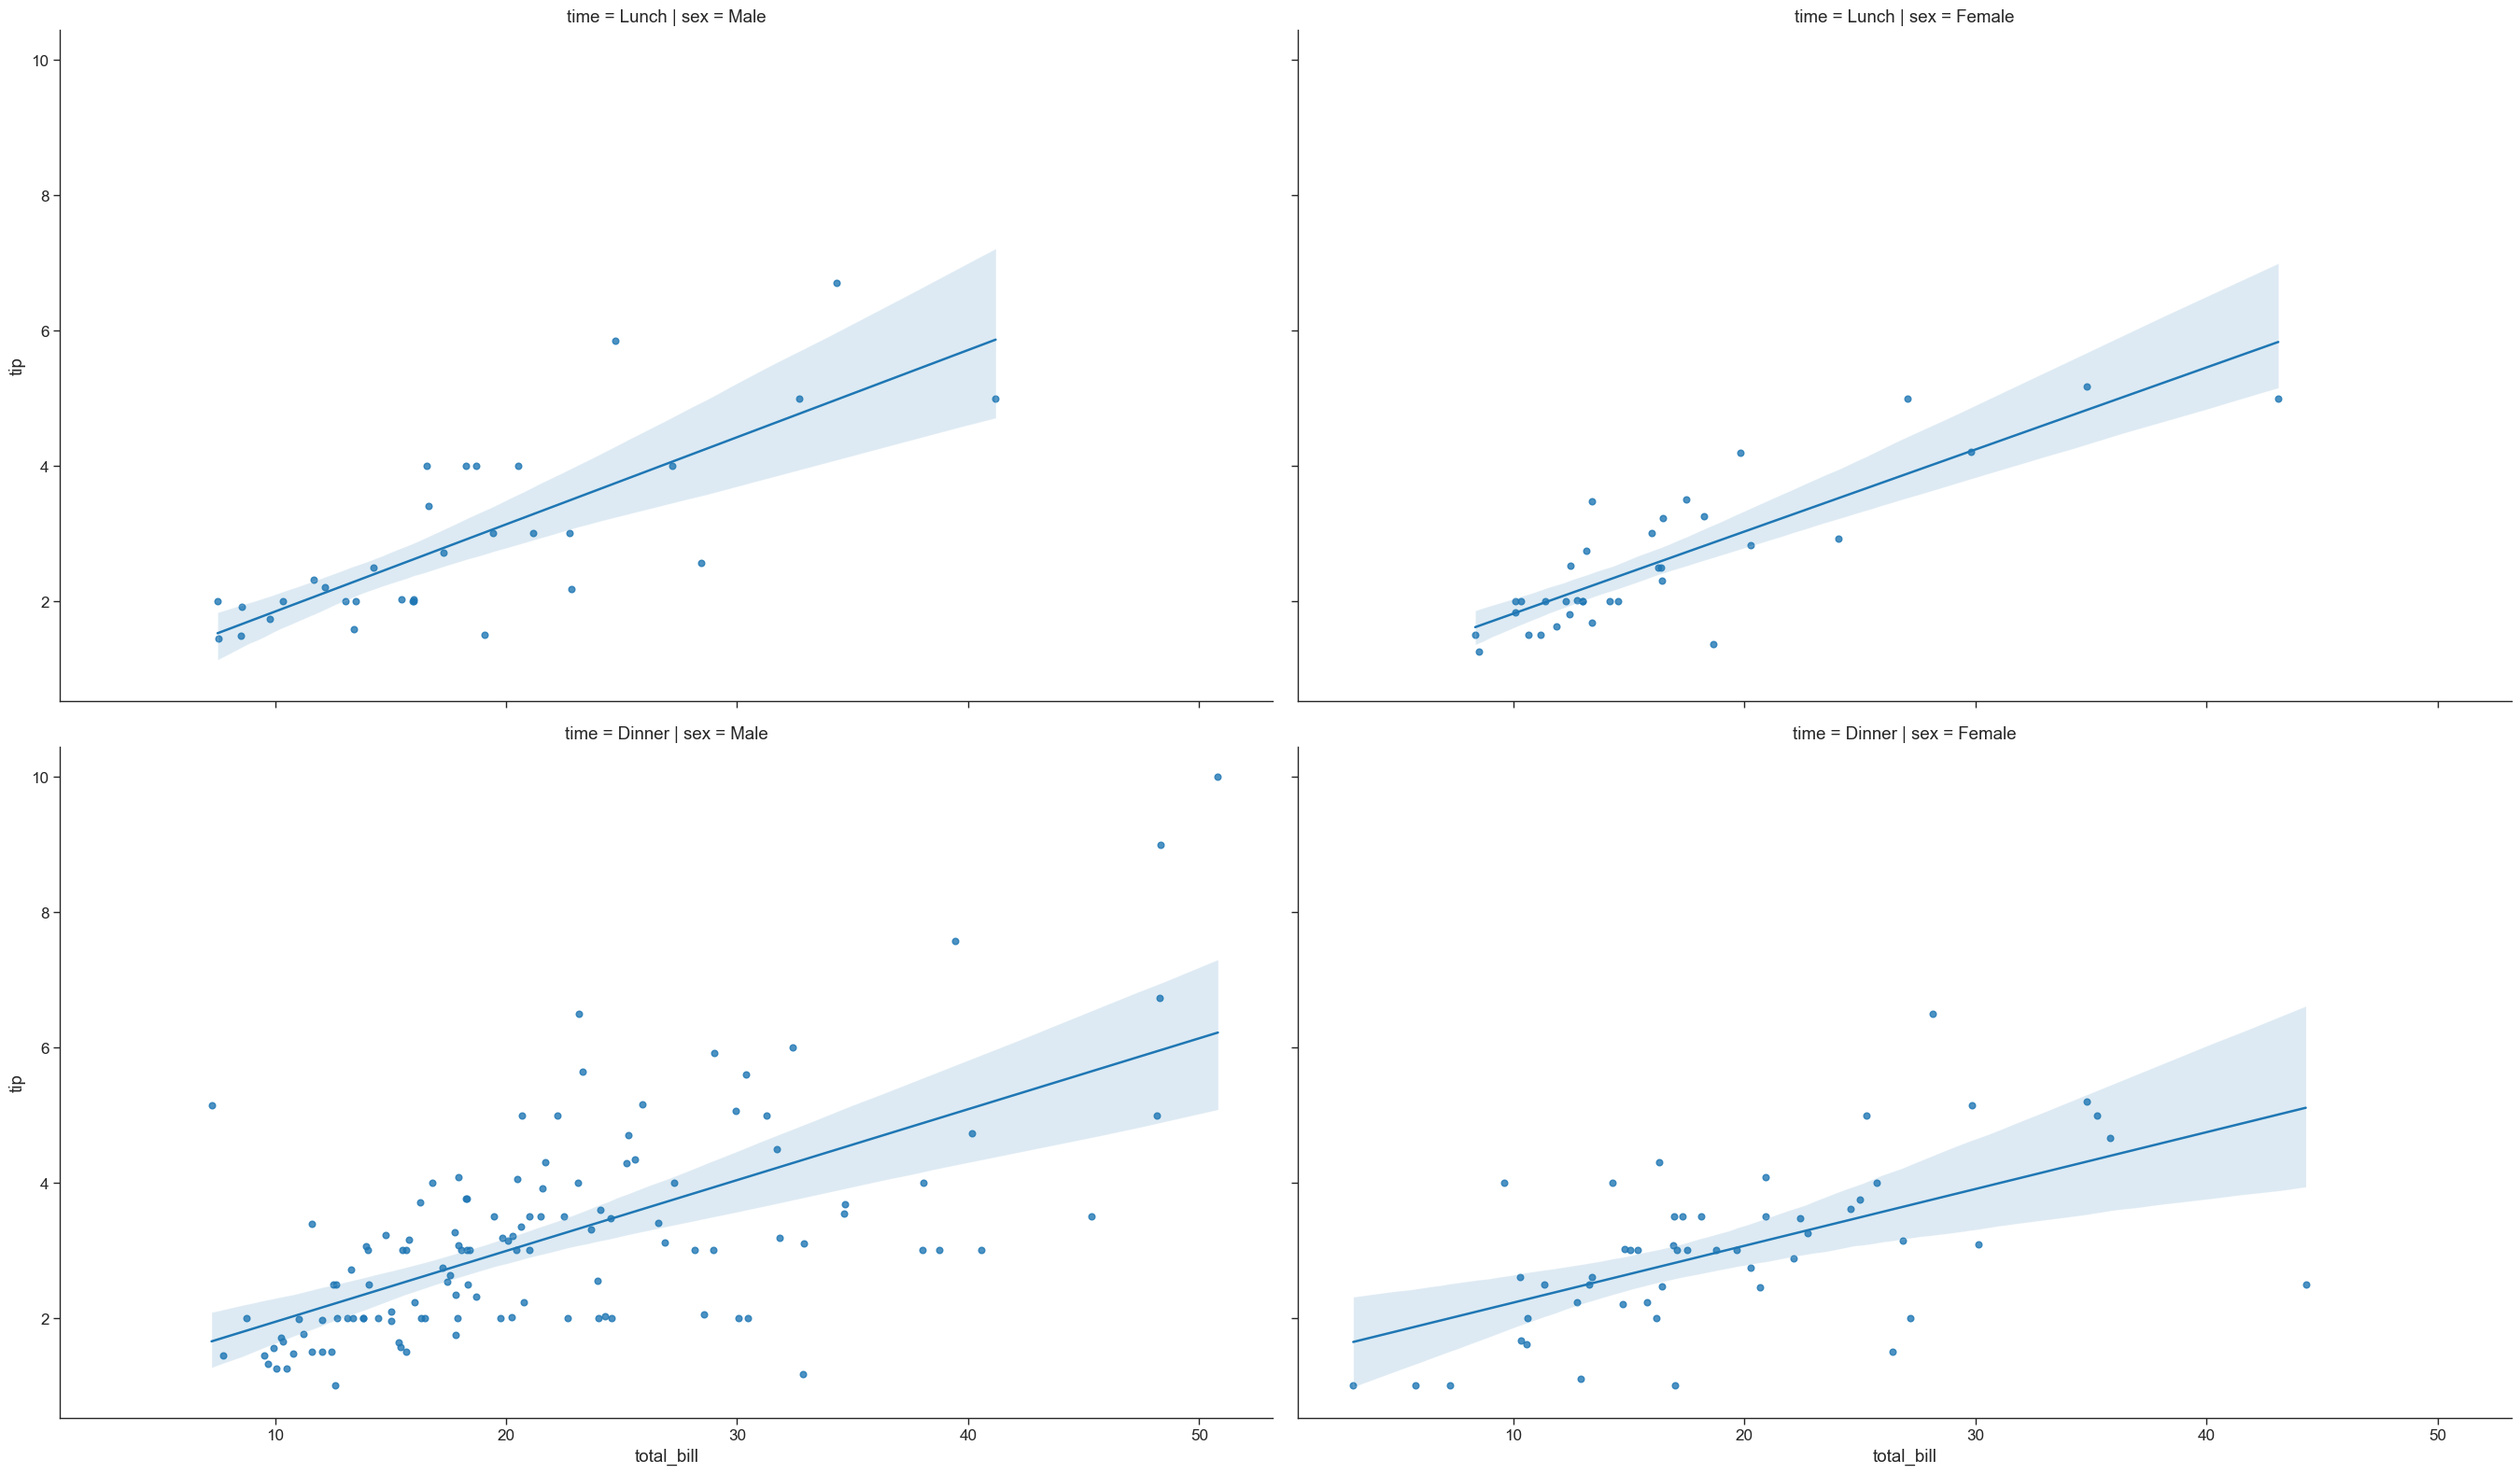

In [50]:
sns.lmplot(x='total_bill',y='tip',col='sex',row='time',data=tips_df,height=8,aspect=1.7)
